### Import the Fashion MNIST dataset

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


### Explore the data

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

### Preprocess the data

In [5]:
import matplotlib.pyplot as plt

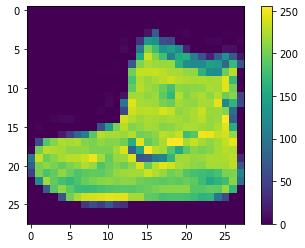

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

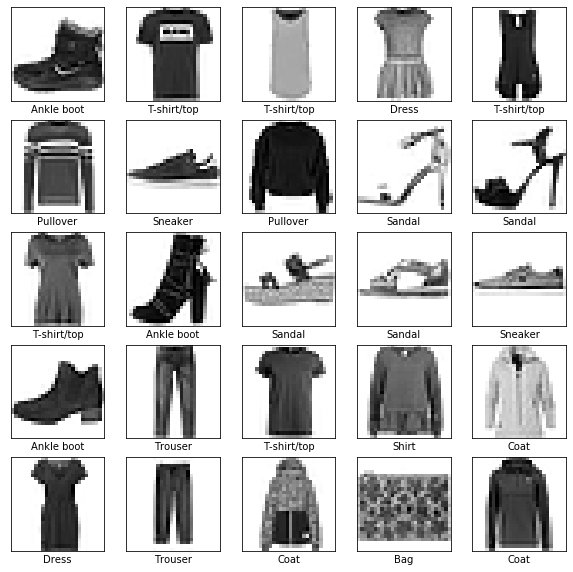

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

### Build the model

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compile the model

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [12]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.5008 - accuracy: 0.8238
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3808 - accuracy: 0.8620
Epoch 3/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3387 - accuracy: 0.8775
Epoch 4/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3146 - accuracy: 0.8842
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2961 - accuracy: 0.8902
Epoch 6/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2828 - accuracy: 0.8947
Epoch 7/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2696 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2583 - accuracy: 0.9045
Epoch 9/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2480 - accuracy: 0.9070
Epoch 10/

### Evaluate accuracy

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2684 - accuracy: 0.8782

Test accuracy: 0.8782


### Make predictions

In [14]:
predictions = model.predict(test_images)
predictions[0]

array([1.4875744e-07, 1.9150982e-06, 3.7833555e-08, 1.1995538e-10,
       2.0192168e-09, 3.9827422e-04, 9.8681176e-07, 3.3268910e-02,
       2.5412266e-06, 9.6632719e-01], dtype=float32)

In [15]:
import numpy as np

In [16]:
np.argmax(predictions[0])

9

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

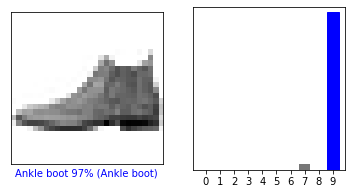

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

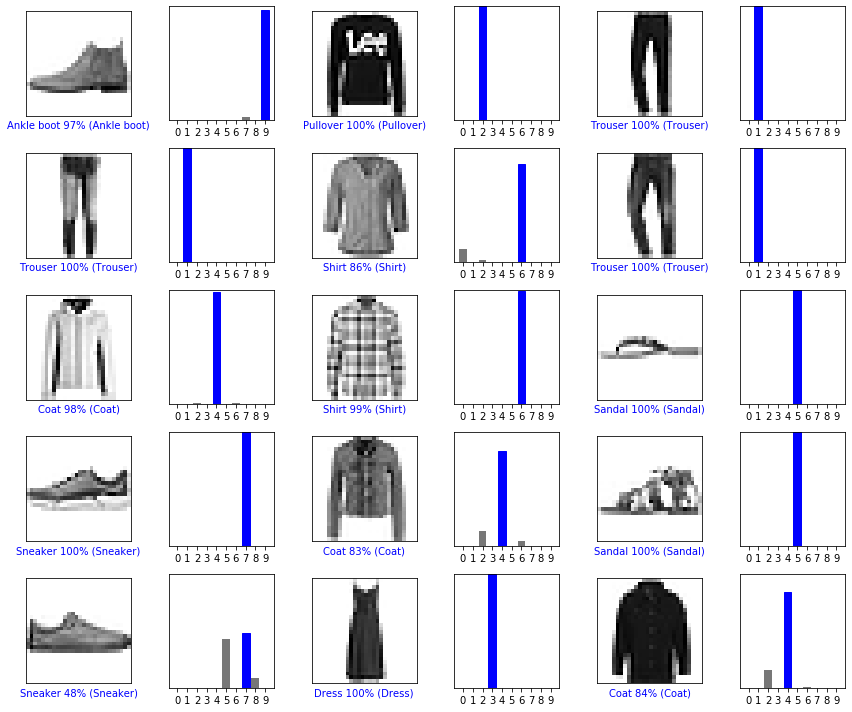

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()